In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading given csv file using pandas 
data = pd.read_csv("Data_for_Discrete_Events_version_for_720.csv", delimiter= ',')

# Converting the dataframe to dictionary 
my_dict = data.to_dict(orient='list')



In [2]:
# Manipulating the dictionary data, and storing in [Key->Hour : Value->NumberOfEvents] relationship
length = len(my_dict['Hour'])
for hour_index in range(length):
    my_dict[my_dict['Hour'][hour_index]] = my_dict['NumberOfEvents'][hour_index]

# deleting the previous incorrect mapping
del my_dict['Hour']
del my_dict['NumberOfEvents']
# my_dict


In [3]:
# Creating a hashmap showing events happening for each Day Of The Semester  
day_of_semester = {}
daily_hours = 0
events_each_day = 0
day_number = 1

# Summing up 24 data records for a single day (1 Day = 24 Hours)
for each_hour in my_dict.keys():
    if each_hour%24 != 0:
        daily_hours += each_hour
        events_each_day += my_dict[each_hour]
    else:
        day_of_semester[day_number] = events_each_day
        day_number += 1
        daily_hours = 0
        events_each_day = 0

# day_of_semester
# print(len(my_hash))

([<matplotlib.axis.YTick at 0x11cae7c10>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20')])

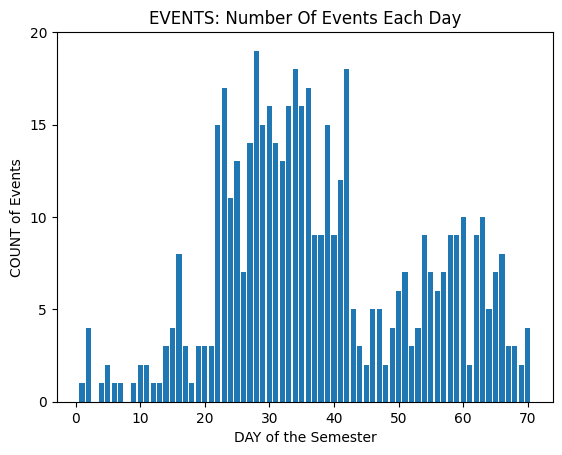

In [4]:
# Plotting number of events each day
x = day_of_semester.keys()
y = day_of_semester.values()
plt.bar(x,y)
plt.title("EVENTS: Number Of Events Each Day")
plt.xlabel("DAY of the Semester")
plt.ylabel("COUNT of Events")
plt.xticks(np.arange(0, 80, 10))
plt.yticks(np.arange(0, 25, 5))

[0.05263157894736842, 0.21052631578947367, 0.0, 0.05263157894736842, 0.10526315789473684, 0.05263157894736842, 0.05263157894736842, 0.0, 0.05263157894736842, 0.10526315789473684, 0.10526315789473684, 0.05263157894736842, 0.05263157894736842, 0.15789473684210525, 0.21052631578947367, 0.42105263157894735, 0.15789473684210525, 0.05263157894736842, 0.15789473684210525, 0.15789473684210525, 0.15789473684210525, 0.7894736842105263, 0.8947368421052632, 0.5789473684210527, 0.6842105263157895, 0.3684210526315789, 0.7368421052631579, 1.0, 0.7894736842105263, 0.8421052631578947, 0.7368421052631579, 0.6842105263157895, 0.8421052631578947, 0.9473684210526315, 0.8421052631578947, 0.8947368421052632, 0.47368421052631576, 0.47368421052631576, 0.7894736842105263, 0.47368421052631576, 0.631578947368421, 0.9473684210526315, 0.2631578947368421, 0.15789473684210525, 0.10526315789473684, 0.2631578947368421, 0.2631578947368421, 0.10526315789473684, 0.21052631578947367, 0.3157894736842105, 0.3684210526315789,

Text(0, 0.5, 'Estimated likelihood of an Event per Day')

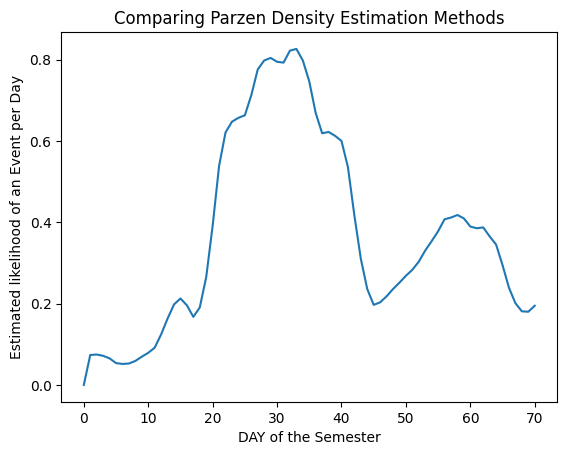

In [11]:
# Implementing Parzen Density Estimation
daily_data = []
# Normalizing the histogram by dividing all of the values by the max number of events in a day
max_events = max(day_of_semester.values())
for events in day_of_semester.values():
    daily_data.append(events/max_events)
print(daily_data)

output = [0]
filter_kernel = [ 0.06, 0.12, 0.20, 0.24, 0.20, 0.12, 0.06 ]
days = range(1,71)
for daily_index in days:
    total = 0
    for filter_index in range(len(filter_kernel)):
        factor = filter_kernel[filter_index]
        data_index = daily_index + filter_index - 3
        if data_index < 0 :
            data_to_scale = 0
        elif data_index >= 70:
            data_index = 0
        else: data_to_scale = daily_data[data_index]

        temp = factor * data_to_scale
        total += temp
    output.append(total)

# Plotting the probability of an event happening on any given day
plt.plot(output)
plt.title("Comparing Parzen Density Estimation Methods")
plt.xlabel("DAY of the Semester")
plt.ylabel("Estimated likelihood of an Event per Day")

In [6]:
# Creating a hashmap showing events happening for each Day Of The Week throughout the Semester  
common_day_of_week = {}
mon_sum, tue_sum, wed_sum, thu_sum, fri_sum, sat_sum, sun_sum = 0, 0, 0, 0, 0, 0, 0

# # Summing up events for each Day Of The Week throughout the Semester
for day in day_of_semester.keys():
    if day%7 == 1:
        sun_sum += day_of_semester[day]
    if day%7 == 2:
        mon_sum += day_of_semester[day]
    if day%7 == 3:
        tue_sum += day_of_semester[day]
    if day%7 == 4:
        wed_sum += day_of_semester[day]
    if day%7 == 5:
        thu_sum += day_of_semester[day]
    if day%7 == 6:
        fri_sum += day_of_semester[day]
    if day%7 == 0:
        sat_sum += day_of_semester[day]

# Mapping the total of each day of the week with their respective days
common_day_of_week['Sun'] = sun_sum
common_day_of_week['Mon'] = mon_sum
common_day_of_week['Tue'] = tue_sum
common_day_of_week['Wed'] = wed_sum
common_day_of_week['Thu'] = thu_sum
common_day_of_week['Fri'] = fri_sum
common_day_of_week['Sat'] = sat_sum

# common_day_of_week

([<matplotlib.axis.YTick at 0x11ce47d00>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100')])

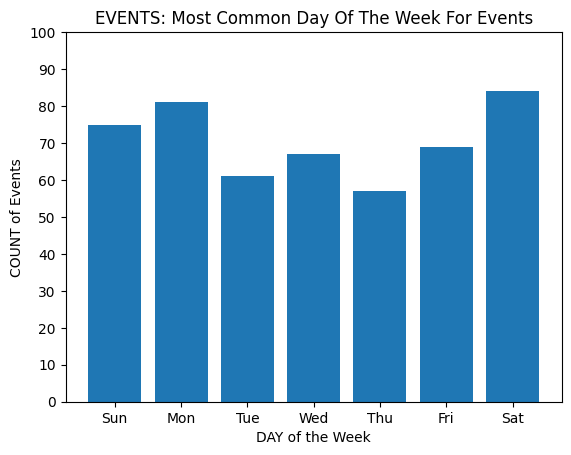

In [7]:
# Plotting most common day of the week for events
x = common_day_of_week.keys()
y = common_day_of_week.values()
plt.bar(x,y)
plt.title("EVENTS: Most Common Day Of The Week For Events")
plt.xlabel("DAY of the Week")
plt.ylabel("COUNT of Events")
# plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, 110, 10))


In [8]:
# Creating a hashmap showing events happening for each week of the semester 
week_of_semester = {}
week_sum = 0
week_number = 1

# Summing up 7 data records for a single week (1 Week = 7 Days)
for day in day_of_semester.keys():
    if day%7 != 0:
        week_sum += day_of_semester[day]
    else:
        week_of_semester[week_number] = week_sum
        week_number += 1
        week_sum = 0

# week_of_semester

([<matplotlib.axis.YTick at 0x11cedee50>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100')])

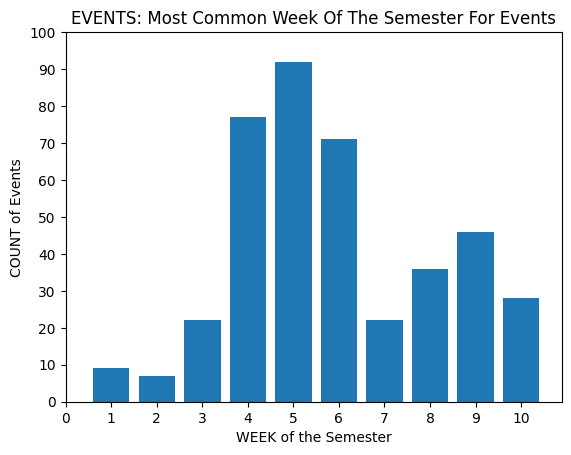

In [9]:
# Plotting most common week of the semester for events
x = week_of_semester.keys()
y = week_of_semester.values()
plt.bar(x,y)
plt.title("EVENTS: Most Common Week Of The Semester For Events")
plt.xlabel("WEEK of the Semester")
plt.ylabel("COUNT of Events")
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 110, 10))
        